In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
train_df=pd.read_csv('E://DATA Science//Datasets//Kaggle//Disaster//train.csv')
test_df=pd.read_csv('E://DATA Science//Datasets//Kaggle//Disaster//test.csv')


In [3]:
text.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [36]:
len(text)

7613

In [5]:
text.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
for i in range(0,10):
    print(text['text'][i],text['target'][i])
    print()

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all 1

Forest fire near La Ronge Sask. Canada 1

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 1

13,000 people receive #wildfires evacuation orders in California  1

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  1

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires 1

#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas 1

I'm on top of the hill and I can see a fire in the woods... 1

There's an emergency evacuation happening now in the building across the street 1

I'm afraid that the tornado is coming to our area... 1



In [ ]:
# print(text[text['target']==0]['text'].tail(15))
for i in range(0,100):
    ind=len(text)-i-1
    if text['target'][ind]==0:
        print(text['text'][ind])
       

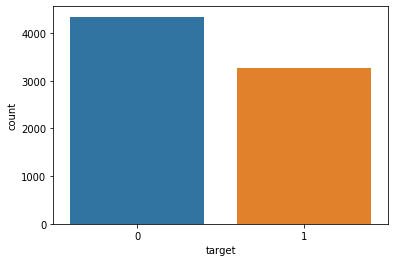

In [13]:
sns.countplot(text['target'])

In [74]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [130]:
def text2count(df,k):
    text=[]
    for i in range(len(df)):
        if df['target'][i]==k:
            text.append(df['text'][i])
    
            
    word=(" ".join(text)).split()
    
    df_dict=dict()
    for i in range(len(word)):
        if word[i] not in df_dict.keys():
            df_dict[word[i]]=k
        else:
            df_dict[word[i]]+=k 
    keys=list(df_dict.keys())
    values=list(df_dict.values())
    df=pd.DataFrame(zip(keys,values),columns=['word','count'])
    return df    

In [133]:
df_1=text2count(train_df,1)
df_1.sort_values(by='count',ascending=False,inplace=True)

In [135]:
text=train_df['text'][0]+train_df['text'][1]

In [138]:
text=[]
for i in range(len(train_df)):
    if train_df['target'][i]==1:     
        text.append(train_df['text'][i])


In [141]:
text=" ".join(text)

In [143]:
text=text.lower()

In [146]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
import numpy as np 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [70]:
train_df=pd.read_csv('E://DATA Science//Datasets//Kaggle//Disaster//train.csv')
test_df=pd.read_csv('E://DATA Science//Datasets//Kaggle//Disaster//test.csv')
sub_df=pd.read_csv('E://DATA Science//Datasets//Kaggle//Disaster//sample_submission.csv')

In [61]:
x = train_df["text"]
y = train_df["target"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
vect = CountVectorizer(stop_words = 'english')

x_train_cv = vect.fit_transform(X_train)
x_test_cv = vect.transform(X_test)

In [64]:
clf = MultinomialNB()
clf.fit(x_train_cv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
pred = clf.predict(x_test_cv)

In [66]:
confusion_matrix(y_test, pred)

array([[735, 139],
       [185, 464]], dtype=int64)

In [67]:
accuracy_score(y_test,pred)

0.7872619829284307

In [68]:
y_test = test_df["text"]
y_test_cv = vect.transform(y_test)
preds = clf.predict(y_test_cv)

In [71]:
sub_df["target"] = preds

In [72]:
sub_df.to_csv('E://DATA Science//Datasets//Kaggle//Disaster//submission.csv')